# Senstivity study for the `eDorone` model - `RMSS2_V3_eDrones`
### This model is based on work by: Saltelli
- Great book (game changer for myself) --> https://www.amazon.com/Sensitivity-Analysis-Practice-Assessing-Scientific/dp/0470870931/ref=sr_1_1?dchild=1&qid=1626197470&refinements=p_27%3AAndrea+Saltelli&s=books&sr=1-1&text=Andrea+Saltelli <br>
- Sensitivity Analysis in Practice: A Guide to Assessing Scientific Models 1st Edition <br>
    - by Andrea Saltelli (Author), Stefano Tarantola (Author), Francesca Campolongo (Author), Marco Ratto (Author)
<br><br>

### Senstivity Analysis
- First-order indices: measures the contribution to the output variance by a single model input alone.
- Second-order indices: measures the contribution to the output variance caused by the interaction of two model inputs.
- Total-order index: measures the contribution to the output variance caused by a model input, including both its first-order effects (the input varying alone) and all higher-order interactions.

### Need to delete `killed` runs to make more sence of graphs

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

# supress warnings
import warnings
warnings.filterwarnings('ignore')

### read the results file
path = 'results/'
filename = 'D_drones_sobal-2021-07-20-16-32-57'
df = pd.read_csv(path + filename + '.csv')

#read the paramters file
param_values = np.load('param_values.npy')

# read problem space from file
with open('problem') as f:
    problem = eval(f.read())

### Resposne histograms - visualize output distributions for each resposne

In [13]:
df_art = df[df['arts_out'].astype(float) < 1e2]
df_art = df_art[df_art['arts_out'].astype(float) < 1e2]
ax = df_art[['arts_out','arte_out']].plot.hist(bins=1000, alpha=0.5, title='Average Resposne Times')
ax.legend(['Standard', 'Emergency'])
ax.set_xlim(0,100)

(0.0, 100.0)

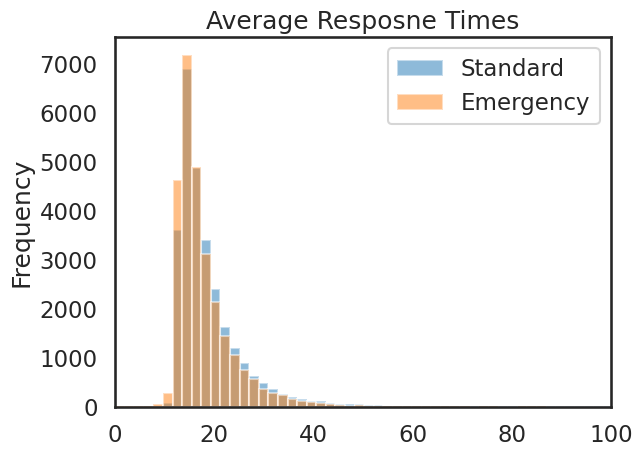

In [14]:
plt.show()

In [15]:
print(df['arts_out'].values.mean(),df['arte_out'].values.mean())

2849.2045339922406 2712.265570961303


In [16]:
df_ff = df[df['fitnessFunc'].astype(float) < 1.5e2]
df_ff['fitnessFunc'].plot.hist(bins=50, alpha=0.5, title='Model Fitness')
ax.set_xlim(0,100)

(0.0, 100.0)

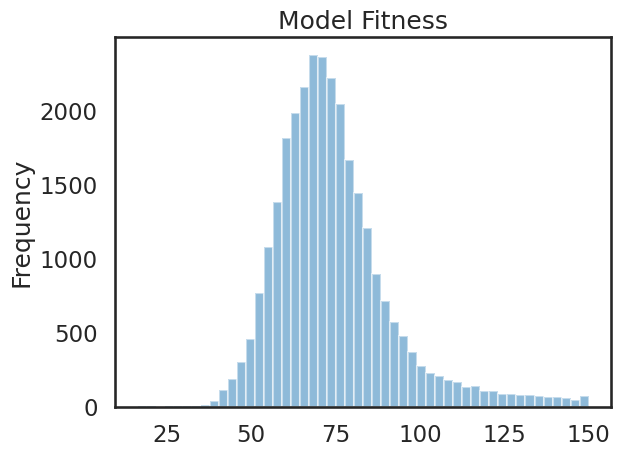

In [17]:
plt.show()

In [20]:
df_toc = df['totalOperatingCosts'].plot.hist(bins=30, alpha=0.5, title='Total Operating Costs [in Millions]')

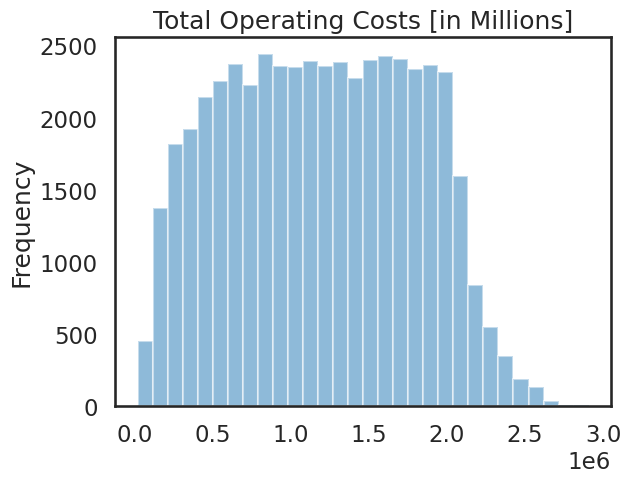

In [21]:
plt.show()

In [9]:
# combine dataframes for some looking :)
# lets combine trim and recombine for use below
df_combi =  pd.concat([pd.DataFrame(param_values), df], axis=1)
df_combi = df_combi[df_combi['arts_out'].astype(float) < 30]
df_combi = df_combi[df_combi['arte_out'].astype(float) < 30]
df_combi = df_combi[df_combi['fitnessFunc'].astype(float) < 100]
# df_combi

In [10]:
import qgrid
df_combi.rename(columns = {0:'service-range', 
                               1:'chance-of-medical-event', 
                               2:'chance-of-standard',
                               3:'startup-costs',
                               4:'mean-payload-weight',
                               5:'maintenace-cost-per-hour',
                               6:'chance_of_typea',
                               7:'chance_of_typeb',
                               8:'chance_of_typec',
                               9:'number_of_drones',
                               10:'number-of-eDrones'
                              }, inplace = True)
#df_drones_w_eDrones_grid = qgrid.show_grid(df_combi.drop(df_combi.columns[[0]], axis = 1), show_toolbar=True, precision=1)
df_drones_w_eDrones_grid = qgrid.show_grid(df_combi, show_toolbar=True, precision=1)
df_drones_w_eDrones_grid
# summary table of potential `good` models

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [11]:
df_drones_w_eDrones_grid.

AttributeError: 'QgridWidget' object has no attribute 'describe'

In [11]:
#let just drag out some values for service radious vs. cost and reesposne time
# fitness set ot 80 max
sr = np.array([112.7,112.7,111.8,111.8,111.8,111.8,105.7,95.6,86.7,86.7,86.7,70.4,70.4,65.7,65.7,50.2,43,28.9])
toc = np.array([290,278,265,253,241,229,216,204,192,180,168,156,143,131,119,107,94.8,82.6])
arts = np.array([29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.4,29.7,29,29,27.5,25.3,22.4,15])
arte = np.array([29.9,29.9,29.9,29.9,29.9,29.9,29.9,29.9,29.9,29.0,29.0,29.0,28.9,27.3,27.3,25.5,22.7,15.9])

In [12]:
# Missing the number of drones
#import matplotlib.pyplot as plt
#plt.plot(toc, sr)
#plt.plot(toc, arts)
#plt.plot(toc, arte)
#plt.plot(secondary_y = 'Average Resposne Time [min]') 
#plt.title('Avalible Performace vs. Total Operating Cost')
#plt.xlabel('Total Operating Cost [$/Month]')
#plt.ylabel('Service Range Capability [km]')

In [13]:
qg_grid = df_drones_w_eDrones_grid.get_changed_df() # need to create iso by range

# Creating dataset
x = qg_grid['service-range']
y = qg_grid['number_of_drones']
z = qg_grid['totalOperatingCosts']

# Creating figure
fig = plt.figure(figsize = (20, 12))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
ax.set_xlabel('Service Range [km]')
ax.set_ylabel('Number of Drones')
ax.set_zlabel('Operating Costs [$/month]')

#
ax.set_title('Response time vs. Service Range by Drones Count \n (Limted montly costs to < 300K)')
ax.set

<bound method Artist.set of <Axes3DSubplot:title={'center':'Response time vs. Service Range by Drones Count \n (Limted montly costs to < 300K)'}, xlabel='Service Range [km]', ylabel='Number of Drones'>>

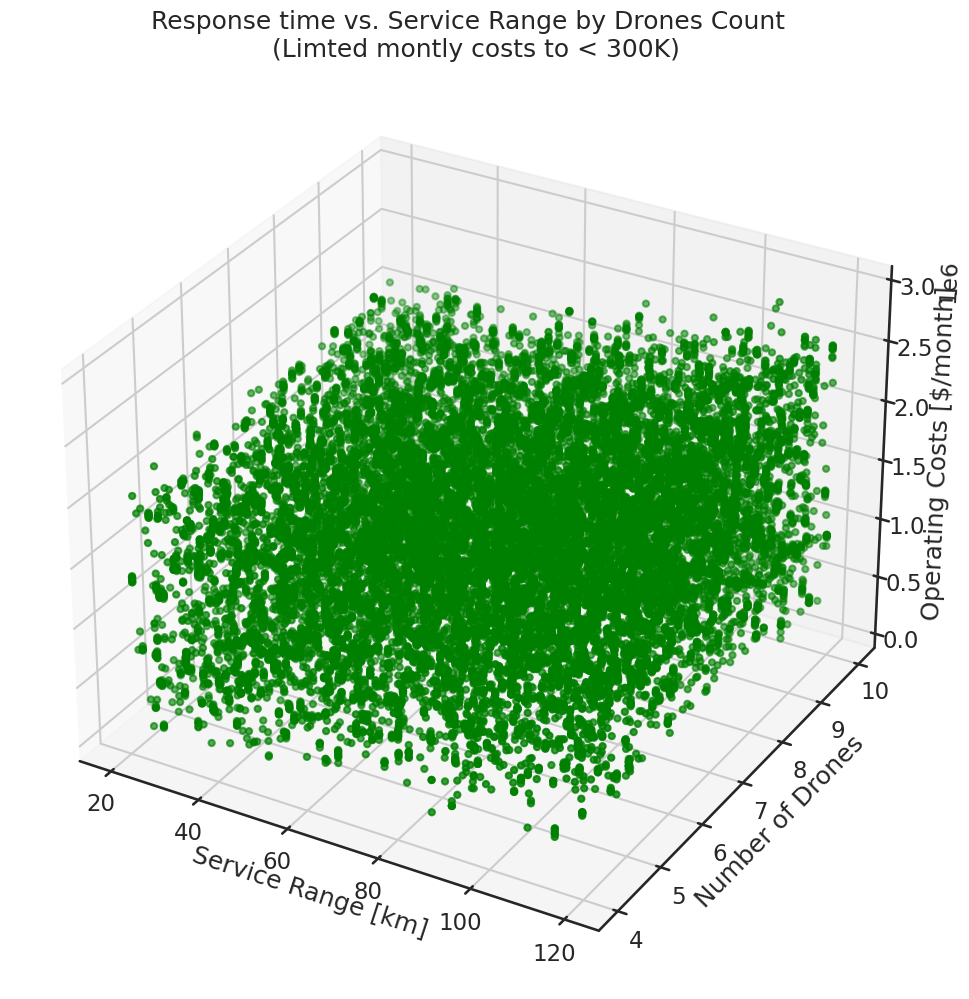

In [14]:
# show plot
plt.show()

In [15]:
df_y = pd.concat([df_combi['arts_out'], df_combi['arte_out'], df_combi['fitnessFunc'], df_combi['totalOperatingCosts']], axis = 1)
df_y

,arts_out,arte_out,fitnessFunc,totalOperatingCosts
24,17.734738,17.936511,71.759109,1.245483e+06
25,18.362372,17.545871,72.883292,1.224747e+06
26,17.781671,18.097386,72.856609,1.207100e+06
27,17.814759,18.369468,73.066747,1.181504e+06
28,18.366252,17.465540,73.460204,1.182786e+06
...,...,...,...,...
49135,13.117000,9.824141,53.713232,8.297435e+05
49136,14.230394,12.358576,54.195490,8.405234e+05
49138,13.836256,11.318625,54.784487,8.571579e+05
49139,12.884783,13.555121,56.907430,8.585080e+05


In [20]:
df_x = pd.concat([df_combi['service-range'], df_combi['chance-of-medical-event'], df_combi['chance-of-standard'], df_combi['startup-costs'], df_combi['mean-payload-weight'],
                  df_combi['maintenace-cost-per-hour'], df_combi['chance_of_typea'], df_combi['chance_of_typeb'], df_combi['chance_of_typec'],
                  df_combi['number_of_drones'], df_combi['number-of-eDrones']], axis = 1)
df_x.rename(columns = {0:'service-range', 
                               1:'chance-of-medical-event', 
                               2:'chance-of-standard',
                               3:'startup-costs',
                               4:'mean-payload-weight',
                               5:'maintenace-cost-per-hour',
                               6:'chance_of_typea',
                               7:'chance_of_typeb',
                               8:'chance_of_typec',
                               9:'number_of_drones',
                               10:'number-of-eDrones'
                              }, inplace = True)
df_x = df_x.to_numpy()

### Bivaritate Scatter Plots - Bivariate scatter plots can be useful to visualize relationships between each input parameter and the response
Need to remove killed models

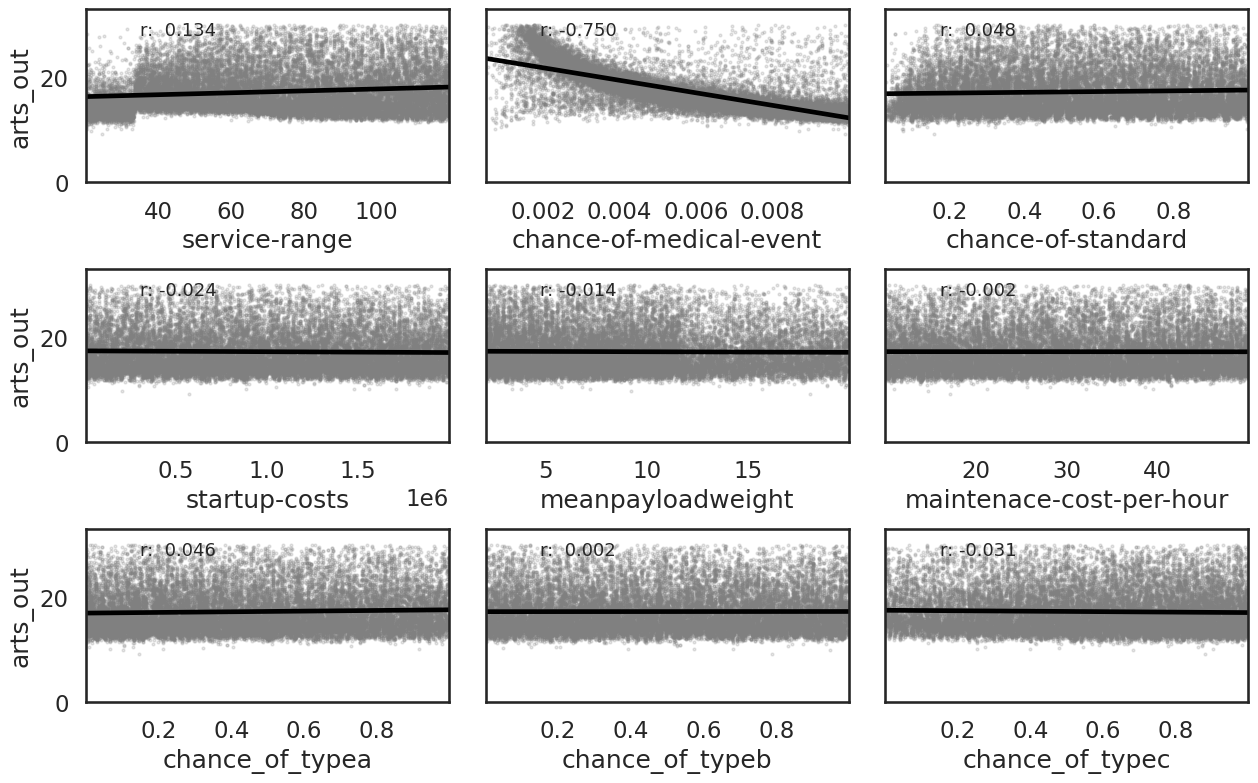

In [21]:
# Standard Event
import scipy

nrow=3
ncol=3

fig, ax = plt.subplots(nrow, ncol, sharey=True)

y = df_y['arts_out']

for i, a in enumerate(ax.flatten()):
    x = df_x[:,i]
    sns.regplot(x, y, ax=a, ci=None, color='k',scatter_kws={'alpha':0.2, 's':4, 'color':'gray'})
    pearson = scipy.stats.pearsonr(x, y)
    a.annotate("r: {:6.3f}".format(pearson[0]), xy=(0.15, 0.85), xycoords='axes fraction',fontsize=13)
    if divmod(i,ncol)[1]>0:
        a.get_yaxis().set_visible(False)
    a.set_xlabel(problem['names'][i])
    a.set_ylim([0,1.1*np.max(y)])

fig.set_size_inches(15,9,forward=False)
fig.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show() # arts_out

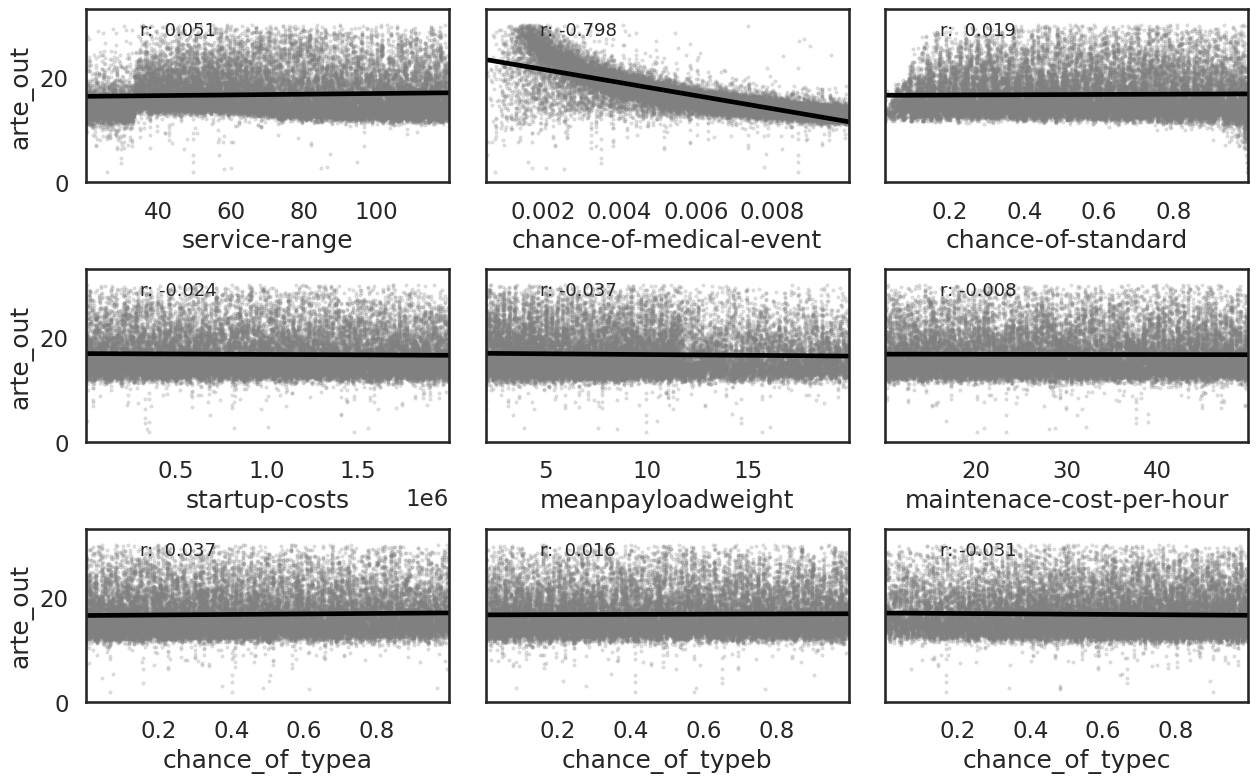

In [22]:
# Emergnecy event
import scipy

nrow=3
ncol=3

fig, ax = plt.subplots(nrow, ncol, sharey=True)

y = df_y['arte_out']

for i, a in enumerate(ax.flatten()):
    x = df_x[:,i]
    sns.regplot(x, y, ax=a, ci=None, color='k',scatter_kws={'alpha':0.2, 's':4, 'color':'gray'})
    pearson = scipy.stats.pearsonr(x, y)
    a.annotate("r: {:6.3f}".format(pearson[0]), xy=(0.15, 0.85), xycoords='axes fraction',fontsize=13)
    if divmod(i,ncol)[1]>0:
        a.get_yaxis().set_visible(False)
    a.set_xlabel(problem['names'][i])
    a.set_ylim([0,1.1*np.max(y)])

fig.set_size_inches(15,9,forward=False)
fig.subplots_adjust(wspace=.1, hspace=0.5)
plt.show() # arte_out

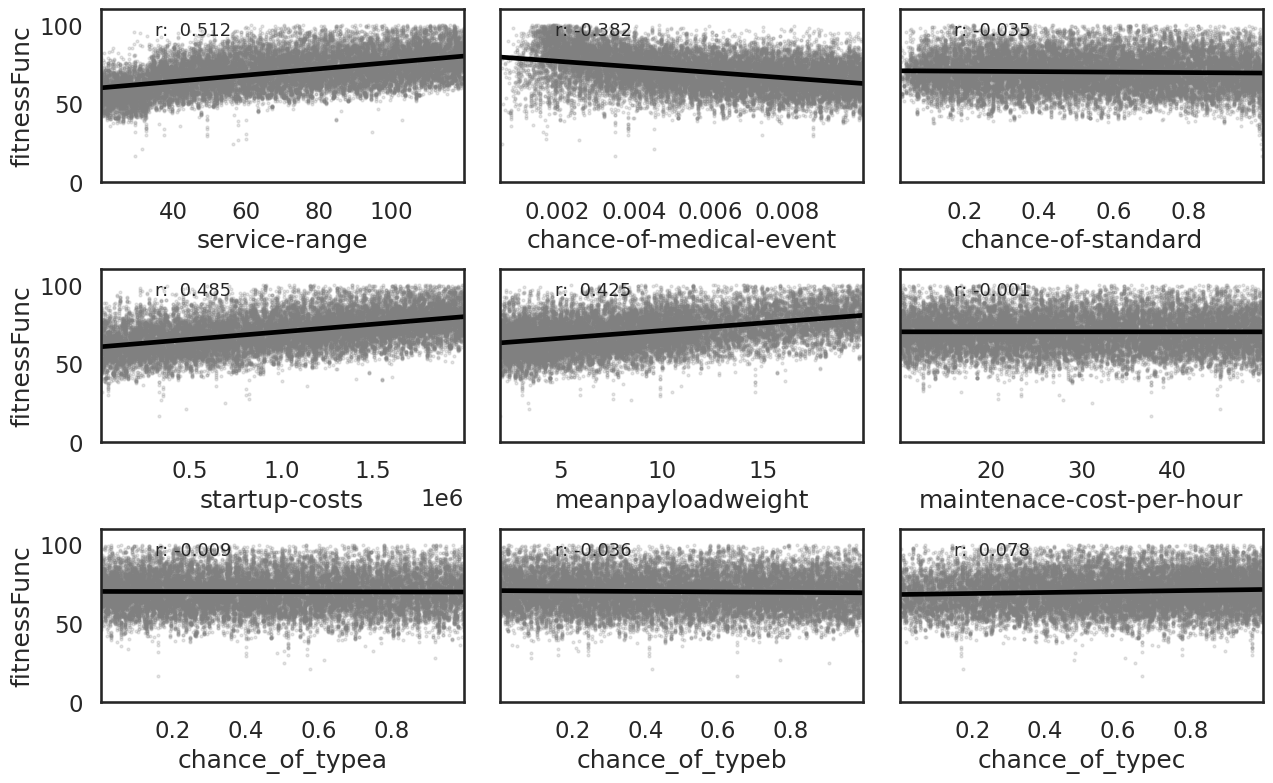

In [23]:
# Finteness
# Need to understand this and look at removing the 1e6

import scipy

nrow=3
ncol=3

fig, ax = plt.subplots(nrow, ncol, sharey=True)

y = df_y['fitnessFunc']

for i, a in enumerate(ax.flatten()):
    x = df_x[:,i]
    sns.regplot(x, y, ax=a, ci=None, color='k',scatter_kws={'alpha':0.2, 's':4, 'color':'gray'})
    pearson = scipy.stats.pearsonr(x, y)
    a.annotate("r: {:6.3f}".format(pearson[0]), xy=(0.15, 0.85), xycoords='axes fraction',fontsize=13)
    if divmod(i,ncol)[1]>0:
        a.get_yaxis().set_visible(False)
    a.set_xlabel(problem['names'][i])
    a.set_ylim([0,1.1*np.max(y)])

fig.set_size_inches(15,9,forward=False)
fig.subplots_adjust(wspace=.1, hspace=0.5)
plt.show() #fitnessFunc

In [ ]:
# Total operational costs
import scipy

nrow=3
ncol=3

fig, ax = plt.subplots(nrow, ncol, sharey=True)

y = df_y['totalOperatingCosts']

for i, a in enumerate(ax.flatten()):
    x = df_x[:,i]
    sns.regplot(x, y, ax=a, ci=None, color='k',scatter_kws={'alpha':0.2, 's':4, 'color':'gray'})
    pearson = scipy.stats.pearsonr(x, y)
    a.annotate("r: {:6.3f}".format(pearson[0]), xy=(0.15, 0.85), xycoords='axes fraction',fontsize=13)
    if divmod(i,ncol)[1]>0:
        a.get_yaxis().set_visible(False)
    a.set_xlabel(problem['names'][i])
    a.set_ylim([0,1.1*np.max(y)])

fig.set_size_inches(15,9,forward=False)
fig.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show() #totalOperatingCosts

## Calulate Sobol Indicies which estimate each inputs contribution to the variance of the response
### S1 - Sirst order, S2 - Second order, ST - Total
use SALib to calculate first-order (S1), second-order (S2) and total (ST) Sobol indices, to estimate each input’s contribution to output variance as well as input interactions. 95% confidence intervals are estimated for each index.

In [106]:
Si_arts = sobol.analyze(problem, df['arts_out'].values, calc_second_order=True, print_to_console=False)

In [98]:
Si_filter = {k:Si_arts[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_arts_df = pd.DataFrame(Si_filter, index=problem['names'])

In [24]:
## Calulate Sobol Indicies which estimate each inputs contribution to the variance of the response
### S1 - First order, S2 - Second order, ST - Total
Si_arts_df

,ST,ST_conf,S1,S1_conf
service-range,0.505224,0.042100,0.002160,0.045908
chance-of-medical-event,0.594331,0.046736,-0.021435,0.044901
chance-of-standard,0.541823,0.043118,0.008922,0.045051
startup-costs,0.523918,0.042054,0.002705,0.048426
meanpayloadweight,0.819439,0.058303,0.177887,0.058061
maintenace-cost-per-hour,0.504842,0.042455,-0.000229,0.049331
chance_of_typea,0.579230,0.045419,0.019832,0.048131
chance_of_typeb,0.577425,0.045806,-0.019476,0.048476
chance_of_typec,0.628593,0.046816,0.050370,0.051880
number_of_drones,0.608338,0.044883,0.032197,0.045737


 ### Plot these indices along with their estimated confidence intervals (shown as error bars)
 If the total-order indices are substantially larger than the first-order indices, then there is likely higher-order interactions occurring

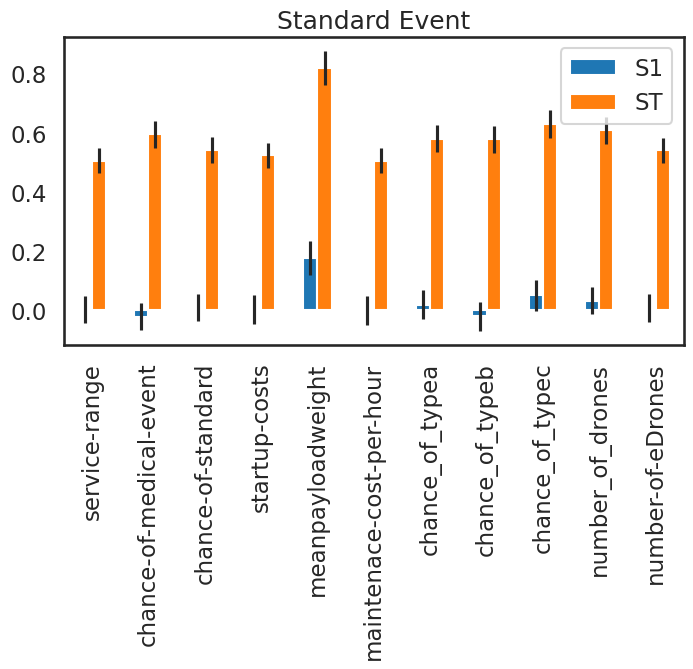

In [25]:
# First order and Total - arts_out
fig, ax = plt.subplots(1)
indices = Si_arts_df[['S1','ST']]
err = Si_arts_df[['S1_conf','ST_conf']]
indices.plot.bar(yerr=err.values.T,ax=ax, title="Standard Event")
fig.set_size_inches(8,4)
plt.show() 

In [26]:
Si_arte = sobol.analyze(problem, df['arte_out'].values, calc_second_order=True, print_to_console=False)
Si_filter = {k:Si_arte[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_arte_df = pd.DataFrame(Si_filter, index=problem['names'])

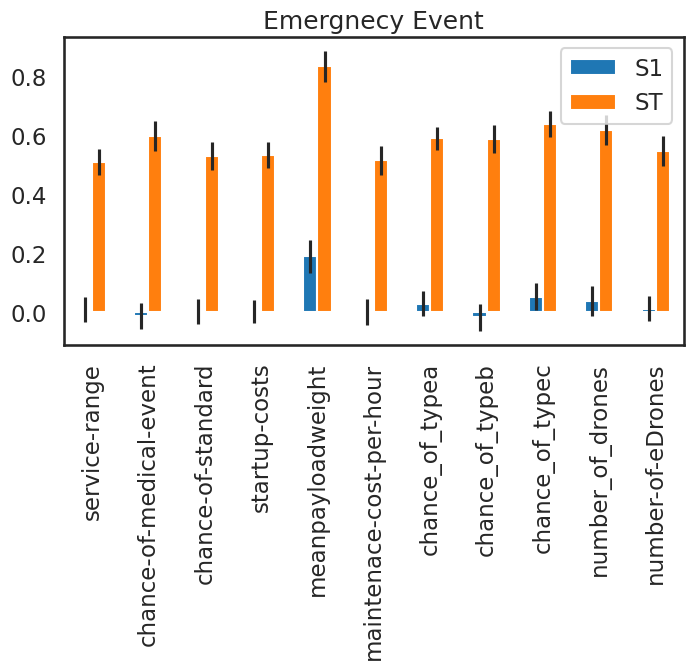

In [27]:
fig, ax = plt.subplots(1)
indices = Si_arte_df[['S1','ST']]
err = Si_arte_df[['S1_conf','ST_conf']]
indices.plot.bar(yerr=err.values.T,ax=ax, title="Emergnecy Event")
fig.set_size_inches(8,4)
plt.show() # arte_out

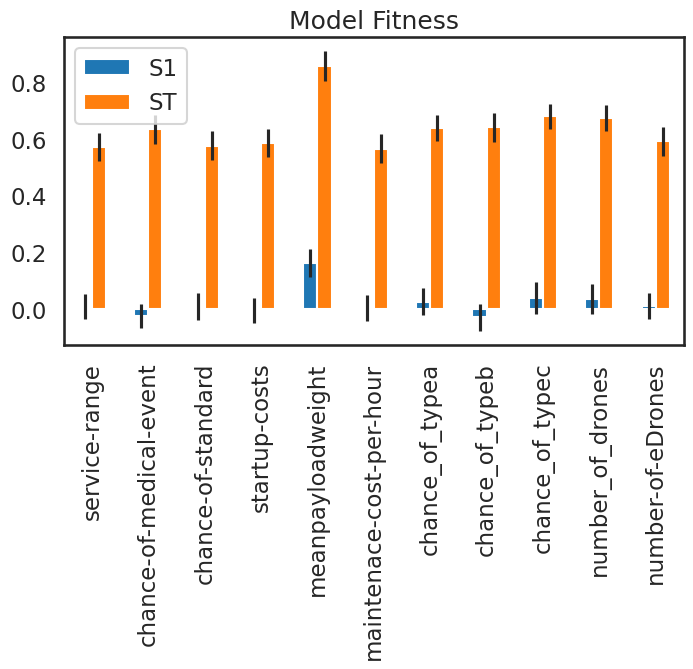

In [28]:
Si_fitnessFunc = sobol.analyze(problem, df['fitnessFunc'].values, calc_second_order=True, print_to_console=False)
Si_filter = {k:Si_fitnessFunc[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_fitnessFunc_df = pd.DataFrame(Si_filter, index=problem['names'])
fig, ax = plt.subplots(1)

indices = Si_fitnessFunc_df[['S1','ST']]
err = Si_fitnessFunc_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax, title="Model Fitness")
fig.set_size_inches(8,4)
plt.show()

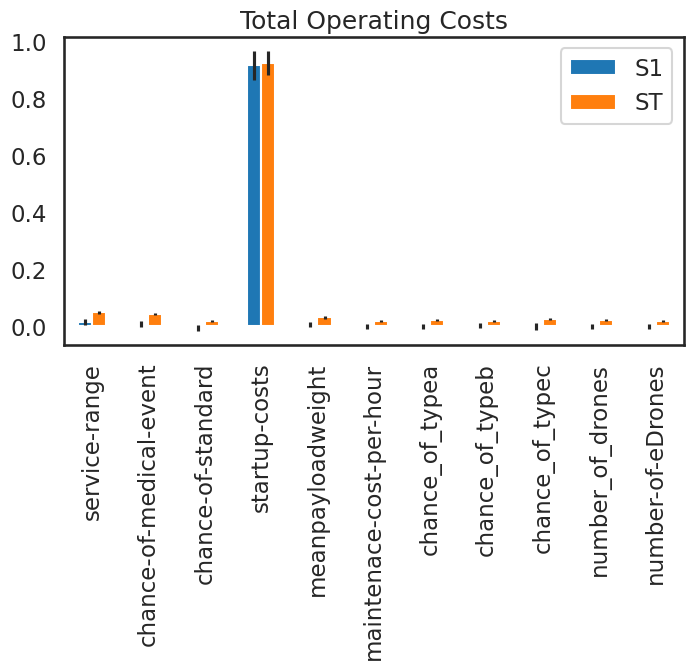

In [29]:
Si_totalOperatingCosts = sobol.analyze(problem, df['totalOperatingCosts'].values, calc_second_order=True, print_to_console=False)
Si_filter = {k:Si_totalOperatingCosts[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_totalOperatingCosts_df = pd.DataFrame(Si_filter, index=problem['names'])
fig, ax = plt.subplots(1)

indices = Si_totalOperatingCosts_df[['S1','ST']]
err = Si_totalOperatingCosts_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax, title = 'Total Operating Costs')
fig.set_size_inches(8,4)
plt.show()

# the start-up costs has the highest S1 and ST incides, indicating that it contributes 90% of the output variance 
# on its own and over 85% when accouting for interactions wiht other paramtrs

In [30]:
%matplotlib inline
import itertools
from math import pi


def normalize(x, xmin, xmax):
    return (x-xmin)/(xmax-xmin)


def plot_circles(ax, locs, names, max_s, stats, smax, smin, fc, ec, lw,
                 zorder):
    s = np.asarray([stats[name] for name in names])
    s = 0.01 + max_s * np.sqrt(normalize(s, smin, smax))

    fill = True
    for loc, name, si in zip(locs, names, s):
        if fc=='w':
            fill=False
        else:
            ec='none'

        x = np.cos(loc)
        y = np.sin(loc)

        circle = plt.Circle((x,y), radius=si, ec=ec, fc=fc, transform=ax.transData._b,
                            zorder=zorder, lw=lw, fill=True)
        ax.add_artist(circle)


def filter(sobol_indices, names, locs, criterion, threshold):
    if criterion in ['ST', 'S1', 'S2']:
        data = sobol_indices[criterion]
        data = np.abs(data)
        data = data.flatten() # flatten in case of S2
        # TODO:: remove nans

        filtered = ([(name, locs[i]) for i, name in enumerate(names) if
                     data[i]>threshold])
        filtered_names, filtered_locs = zip(*filtered)
    elif criterion in ['ST_conf', 'S1_conf', 'S2_conf']:
        raise NotImplementedError
    else:
        raise ValueError('unknown value for criterion')

    return filtered_names, filtered_locs


def plot_sobol_indices(sobol_indices, criterion='ST', threshold=0.01):
    '''plot sobol indices on a radial plot

    Parameters
    ----------
    sobol_indices : dict
                    the return from SAlib
    criterion : {'ST', 'S1', 'S2', 'ST_conf', 'S1_conf', 'S2_conf'}, optional
    threshold : float
                only visualize variables with criterion larger than cutoff

    '''
    max_linewidth_s2 = 15#25*1.8
    max_s_radius = 0.3

    # prepare data
    # use the absolute values of all the indices
    #sobol_indices = {key:np.abs(stats) for key, stats in sobol_indices.items()}

    # dataframe with ST and S1
    sobol_stats = {key:sobol_indices[key] for key in ['ST', 'S1']}
    sobol_stats = pd.DataFrame(sobol_stats, index=problem['names'])

    smax = sobol_stats.max().max()
    smin = sobol_stats.min().min()

    # dataframe with s2
    s2 = pd.DataFrame(sobol_indices['S2'], index=problem['names'],
                      columns=problem['names'])
    s2[s2<0.0]=0. #Set negative values to 0 (artifact from small sample sizes)
    s2max = s2.max().max()
    s2min = s2.min().min()

    names = problem['names']
    n = len(names)
    ticklocs = np.linspace(0, 2*pi, n+1)
    locs = ticklocs[0:-1]

    filtered_names, filtered_locs = filter(sobol_indices, names, locs,
                                           criterion, threshold)

    # setup figure
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.grid(False)
    ax.spines['polar'].set_visible(False)
    ax.set_xticks(filtered_locs)

    ax.set_xticklabels(filtered_names)
    ax.set_yticklabels([])
    ax.set_ylim(top=1.4)
    legend(ax)

    # plot ST
    plot_circles(ax, filtered_locs, filtered_names, max_s_radius,
                 sobol_stats['ST'], smax, smin, 'w', 'k', 1, 9)

    # plot S1
    plot_circles(ax, filtered_locs, filtered_names, max_s_radius,
                 sobol_stats['S1'], smax, smin, 'k', 'k', 1, 10)

    # plot S2
    for name1, name2 in itertools.combinations(zip(filtered_names, filtered_locs), 2):
        name1, loc1 = name1
        name2, loc2 = name2

        weight = s2.loc[name1, name2]
        lw = 0.5+max_linewidth_s2*normalize(weight, s2min, s2max)
        ax.plot([loc1, loc2], [1,1], c='darkgray', lw=lw, zorder=1)

    return fig


from matplotlib.legend_handler import HandlerPatch
class HandlerCircle(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = plt.Circle(xy=center, radius=orig_handle.radius)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

def legend(ax):
    some_identifiers = [plt.Circle((0,0), radius=5, color='k', fill=False, lw=1),
                        plt.Circle((0,0), radius=5, color='k', fill=True),
                        plt.Line2D([0,0.5], [0,0.5], lw=8, color='darkgray')]
    ax.legend(some_identifiers, ['ST', 'S1', 'S2'],
              loc=(1,0.75), borderaxespad=0.1, mode='expand',
              handler_map={plt.Circle: HandlerCircle()})


sns.set_style('whitegrid')
# Si_arts
# Si_arte
# Si_fitnessFunc
# Si_totalOperatingCosts


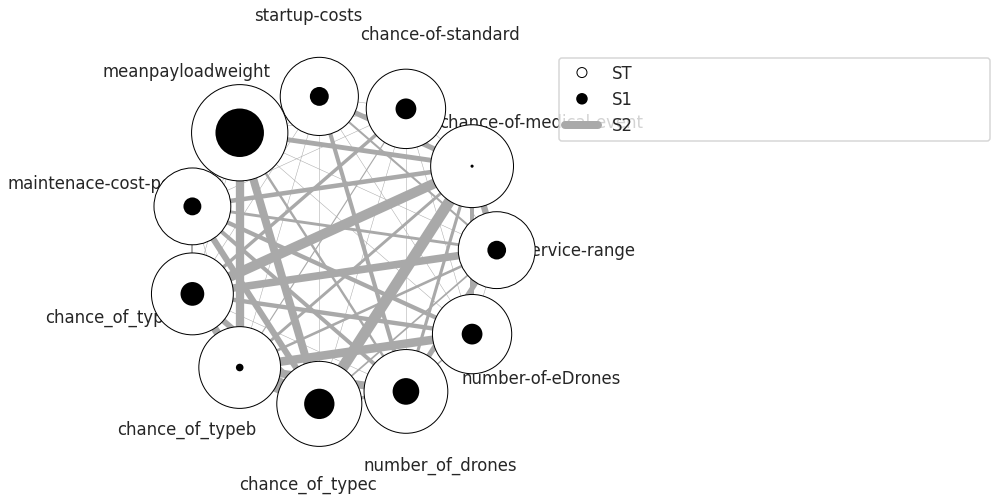

In [31]:
fig = plot_sobol_indices(Si_arts, criterion='ST', threshold=0)
fig.set_size_inches(8,8)
# plot second-order pairwse insteractions between inputs.
# the size of the ST an S1 circles correspond to the mormalized total and first-order indicnies
# the width of the connecting lines indicates relative importnace of their pairwise interaction on the respsone

# width of line represents the importace of pairwise variable interaction on output varaince 

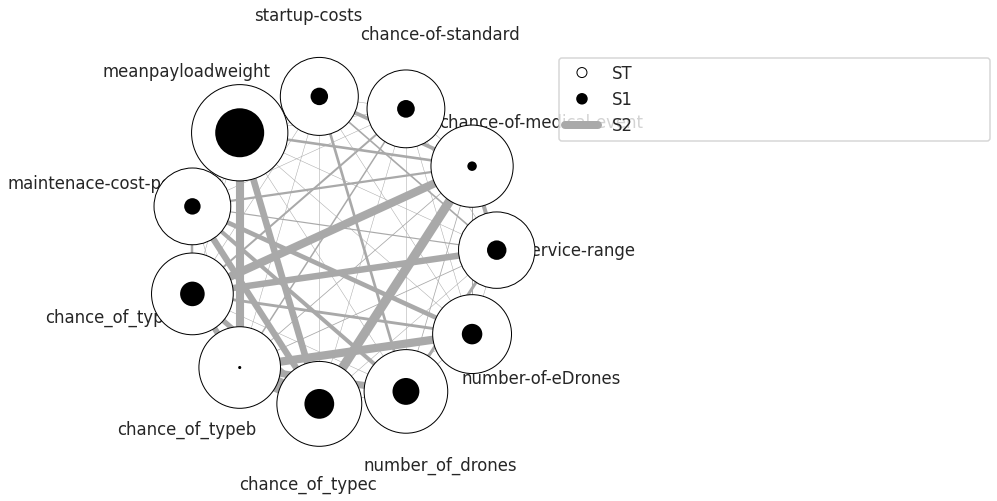

In [32]:
fig = plot_sobol_indices(Si_arte, criterion='ST', threshold=0)
fig.set_size_inches(8,8)
# plot second-order pairwse insteractions between inputs.
# the size of the ST an S1 circles correspond to the mormalized total and first-order indicnies
# the width of the connecting lines indicates relative importnace of their pairwise interaction on the respsone

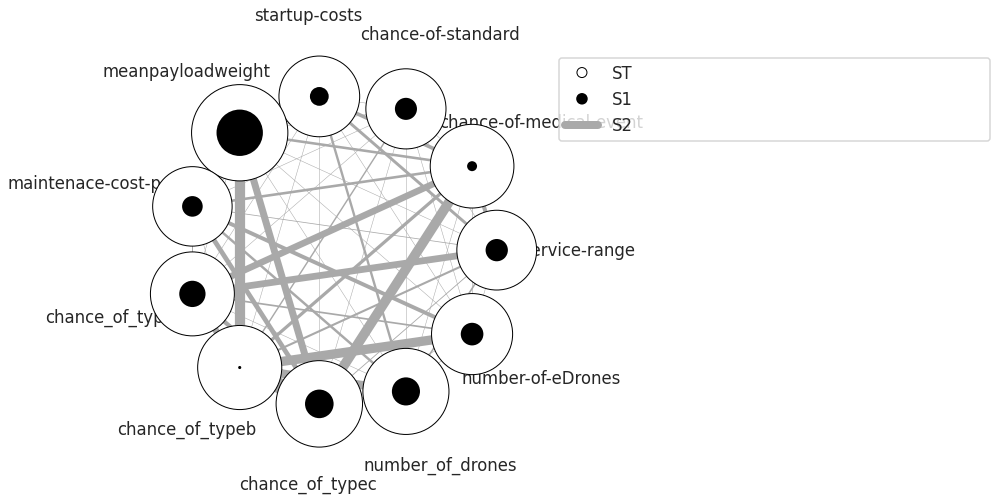

In [33]:
fig = plot_sobol_indices(Si_fitnessFunc, criterion='ST', threshold=0)
fig.set_size_inches(8,8)
# plot second-order pairwse insteractions between inputs.
# the size of the ST an S1 circles correspond to the mormalized total and first-order indicnies
# the width of the connecting lines indicates relative importnace of their pairwise interaction on the respsone

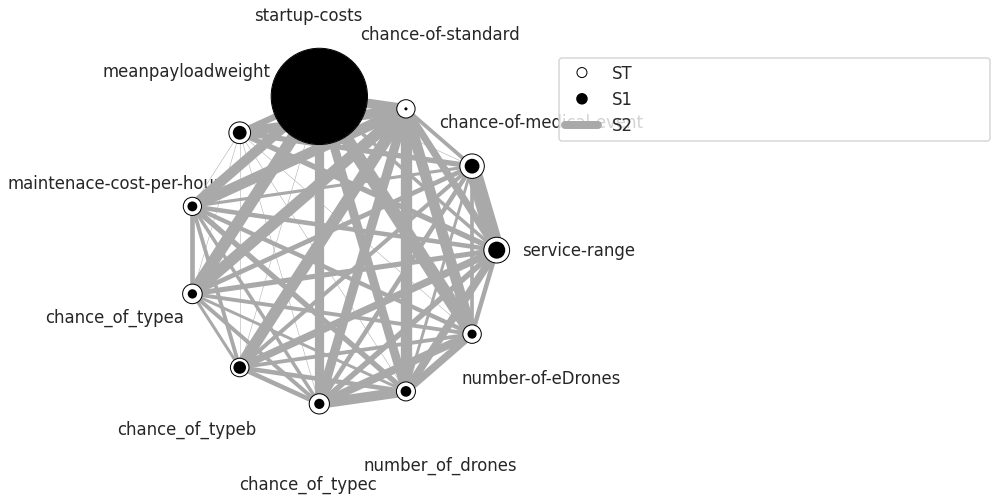

In [34]:
fig = plot_sobol_indices(Si_totalOperatingCosts, criterion='ST', threshold=0)
fig.set_size_inches(8,8)
# plot second-order pairwse insteractions between inputs.
# the size of the ST an S1 circles correspond to the mormalized total and first-order indicnies
# the width of the connecting lines indicates relative importnace of their pairwise interaction on the respsone

In [ ]:
netlogo.kill_workspace()